In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [159]:
df = pd.read_csv(r'C:\Users\gokde\Desktop\4. sinif\Burcu hoca\Final Öncesi\heart.csv')

* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

# EDA

In [160]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [161]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


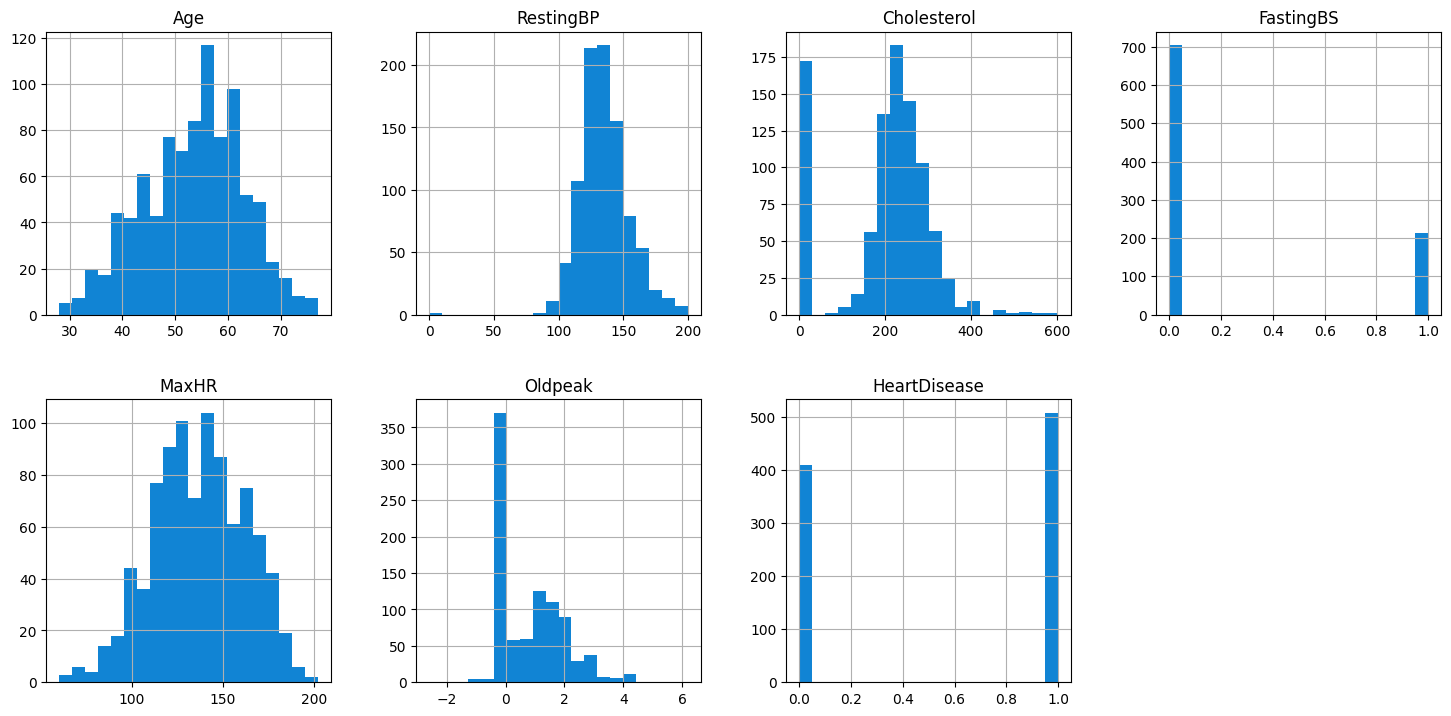

In [162]:
#plt.style.available
plt.style.use('seaborn-v0_8-muted')
df.hist(figsize=(18, 18),
        bins=20,
        layout=(4, 4),
        color='#1184D4') #spss rengi :D
plt.show()  


In [163]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [164]:
cat_cols = [col for col in df.columns if df[col].nunique() < 10]
num_cols = [col for col in df.columns if df[col].nunique() > 10] #and df[col].dtype in ['int64', 'float64']]
#string_cols = df.select_dtypes(include="object").columns #for label encoding
print("Categorical columns: ", cat_cols)
print("Numerical columns: ", num_cols)

Categorical columns:  ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
Numerical columns:  ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [165]:
encoded_df = df[cat_cols].apply(LabelEncoder().fit_transform)
encoded_df

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,1,1,0,1,0,2,0
1,0,2,0,1,0,1,1
2,1,1,0,2,0,2,0
3,0,0,0,1,1,1,1
4,1,2,0,1,0,2,0
...,...,...,...,...,...,...,...
913,1,3,0,1,0,1,1
914,1,0,1,1,0,1,1
915,1,0,0,1,1,1,1
916,0,1,0,0,0,1,1


In [166]:
for i in df[cat_cols].columns:
    print(df[i].value_counts())
    print("\n")

Sex
M    725
F    193
Name: count, dtype: int64


ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


FastingBS
0    704
1    214
Name: count, dtype: int64


RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


HeartDisease
1    508
0    410
Name: count, dtype: int64




In [167]:
for i in encoded_df.columns:
    print(encoded_df[i].value_counts())
    print("\n")

Sex
1    725
0    193
Name: count, dtype: int64


ChestPainType
0    496
2    203
1    173
3     46
Name: count, dtype: int64


FastingBS
0    704
1    214
Name: count, dtype: int64


RestingECG
1    552
0    188
2    178
Name: count, dtype: int64


ExerciseAngina
0    547
1    371
Name: count, dtype: int64


ST_Slope
1    460
2    395
0     63
Name: count, dtype: int64


HeartDisease
1    508
0    410
Name: count, dtype: int64




In [168]:
num_cols.append('HeartDisease')
num_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']

In [169]:
encoded_df['HeartDisease'] = df['HeartDisease']
encoded_df.columns

Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

In [170]:
for i in encoded_df.columns:
    print(encoded_df[i].value_counts())
    print("\n")

Sex
1    725
0    193
Name: count, dtype: int64


ChestPainType
0    496
2    203
1    173
3     46
Name: count, dtype: int64


FastingBS
0    704
1    214
Name: count, dtype: int64


RestingECG
1    552
0    188
2    178
Name: count, dtype: int64


ExerciseAngina
0    547
1    371
Name: count, dtype: int64


ST_Slope
1    460
2    395
0     63
Name: count, dtype: int64


HeartDisease
1    508
0    410
Name: count, dtype: int64




Sağdaki grafiği çıkartabilirim

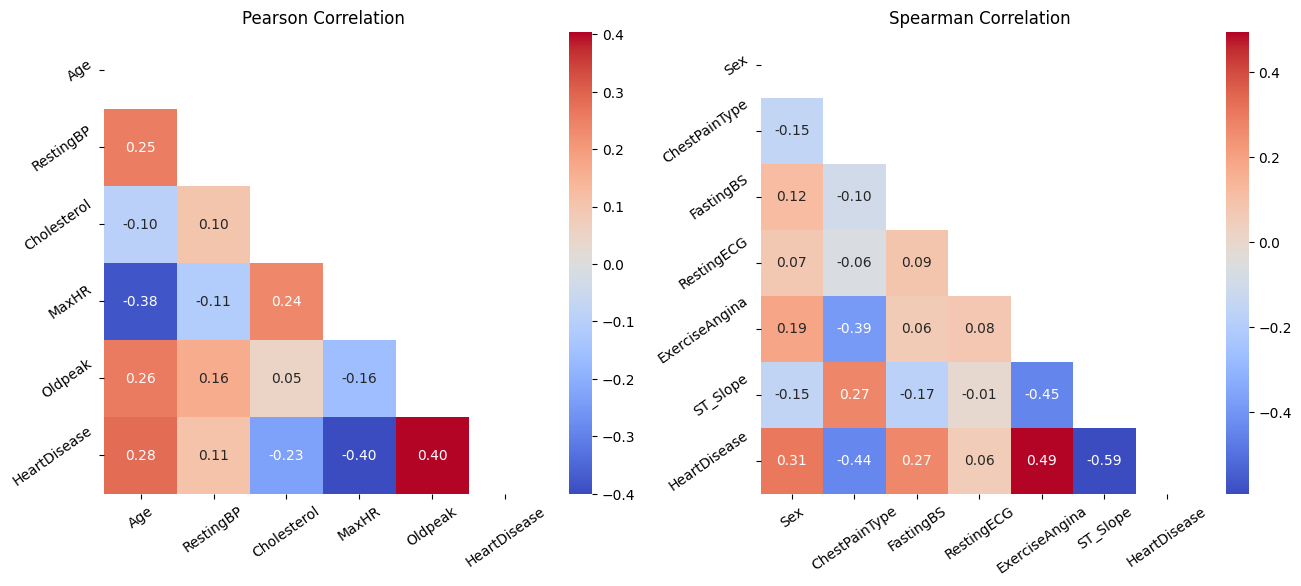

In [171]:
plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
mask1 = np.triu(np.ones_like(df[num_cols].corr()))
mask2 = np.triu(np.ones_like(encoded_df.corr()))
sns.heatmap(df[num_cols].corr(numeric_only=True, method='pearson'), annot=True, fmt='.2f', cmap='coolwarm', mask= mask1)
plt.title('Pearson Correlation')
plt.xticks(rotation=35)
plt.yticks(rotation=35)

plt.subplot(1, 3, 2)
sns.heatmap(encoded_df.corr(numeric_only=True, method='spearman'), annot=True, fmt='.2f', cmap='coolwarm', mask= mask2)
plt.title('Spearman Correlation')
plt.xticks(rotation=35)
plt.yticks(rotation=35)

plt.show()

Çıkartabilirim

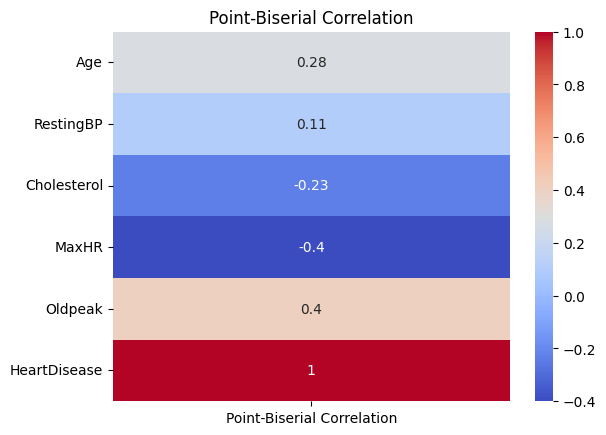

In [172]:
from scipy.stats import pointbiserialr

continuous_vars = num_cols

binary_var = df['HeartDisease']
correlations = {col: pointbiserialr(binary_var, df[col])[0] for col in continuous_vars}

correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Point-Biserial Correlation'])
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', cbar=True)
plt.title('Point-Biserial Correlation')
plt.show()


In [173]:
print(df[cat_cols].dtypes, '\n\n')

for i in df[cat_cols].columns:
        print(df[i].value_counts())
        print('\n')
        
df[cat_cols]

Sex               object
ChestPainType     object
FastingBS          int64
RestingECG        object
ExerciseAngina    object
ST_Slope          object
HeartDisease       int64
dtype: object 


Sex
M    725
F    193
Name: count, dtype: int64


ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


FastingBS
0    704
1    214
Name: count, dtype: int64


RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


HeartDisease
1    508
0    410
Name: count, dtype: int64




,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,M,ATA,0,Normal,N,Up,0
1,F,NAP,0,Normal,N,Flat,1
2,M,ATA,0,ST,N,Up,0
3,F,ASY,0,Normal,Y,Flat,1
4,M,NAP,0,Normal,N,Up,0
...,...,...,...,...,...,...,...
913,M,TA,0,Normal,N,Flat,1
914,M,ASY,1,Normal,N,Flat,1
915,M,ASY,0,Normal,Y,Flat,1
916,F,ATA,0,LVH,N,Flat,1


In [174]:
fig = px.box(df, y="Age", x="HeartDisease",
             title="Distribution of Age",
             width=800, height=600)
fig.show()

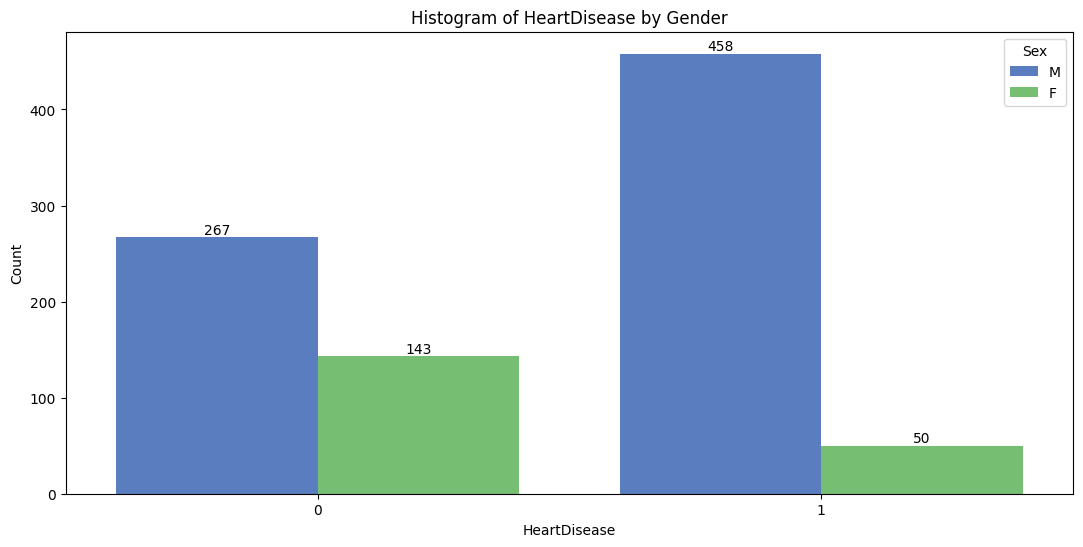

In [175]:
plt.figure(figsize=(13, 6))

ax = sns.countplot(data=df, x='HeartDisease', hue='Sex', dodge=True)

# Çubukların üstüne sayıları eklemek için
ax.bar_label(ax.containers[0], fontsize=10, label_type='edge')
ax.bar_label(ax.containers[1], fontsize=10, label_type='edge')

plt.title('Histogram of HeartDisease by Gender')
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.show()

---
# ML Algorithms

In [176]:
all_encoded = df.apply(LabelEncoder().fit_transform)
all_encoded

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


In [177]:
def metrics(y_test, y_pred):
    
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    results = {}
    results['Accuracy'] = accuracy_score(y_test, y_pred)
    results['Precision'] = precision_score(y_test, y_pred, pos_label=0)
    results['Recall'] = recall_score(y_test, y_pred, pos_label=0)
    results['F1 Score'] = f1_score(y_test, y_pred, pos_label=0)
    return results


In [178]:
from sklearn.model_selection import train_test_split

X = all_encoded.drop(columns=['HeartDisease'])
y = all_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

### Decision Tree

In [179]:
from sklearn.tree import DecisionTreeClassifier

model_DTC = DecisionTreeClassifier(criterion='gini',                         
                                   splitter='best',
                                   max_depth=None,    #Yüksek/sınırsız olursa overfitting, çok düşük olursa underfitting olabilir
                                   min_samples_split=2,
                                   min_samples_leaf=1,
                                   min_weight_fraction_leaf=0.0,
                                   max_features=None,
                                   random_state=11,
                                   max_leaf_nodes=None,
                                   class_weight=None)
model_DTC.fit(X_train, y_train)

y_test_pred = model_DTC.predict(X_test)
y_train_pred = model_DTC.predict(X_train)

print(metrics(y_train, y_train_pred))
print(metrics(y_test, y_test_pred))

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}
{'Accuracy': 0.7880434782608695, 'Precision': 0.8214285714285714, 'Recall': 0.7419354838709677, 'F1 Score': 0.7796610169491526}


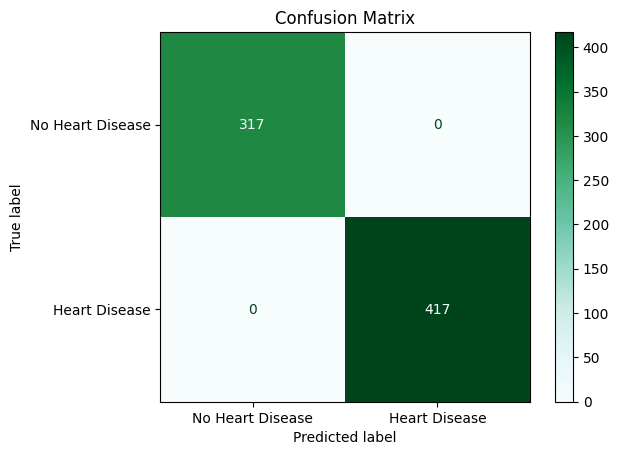

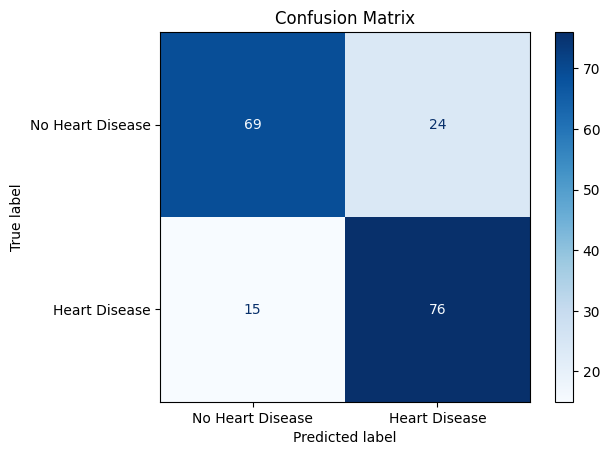

In [180]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap='BuGn')
plt.title('Confusion Matrix')
plt.show()

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


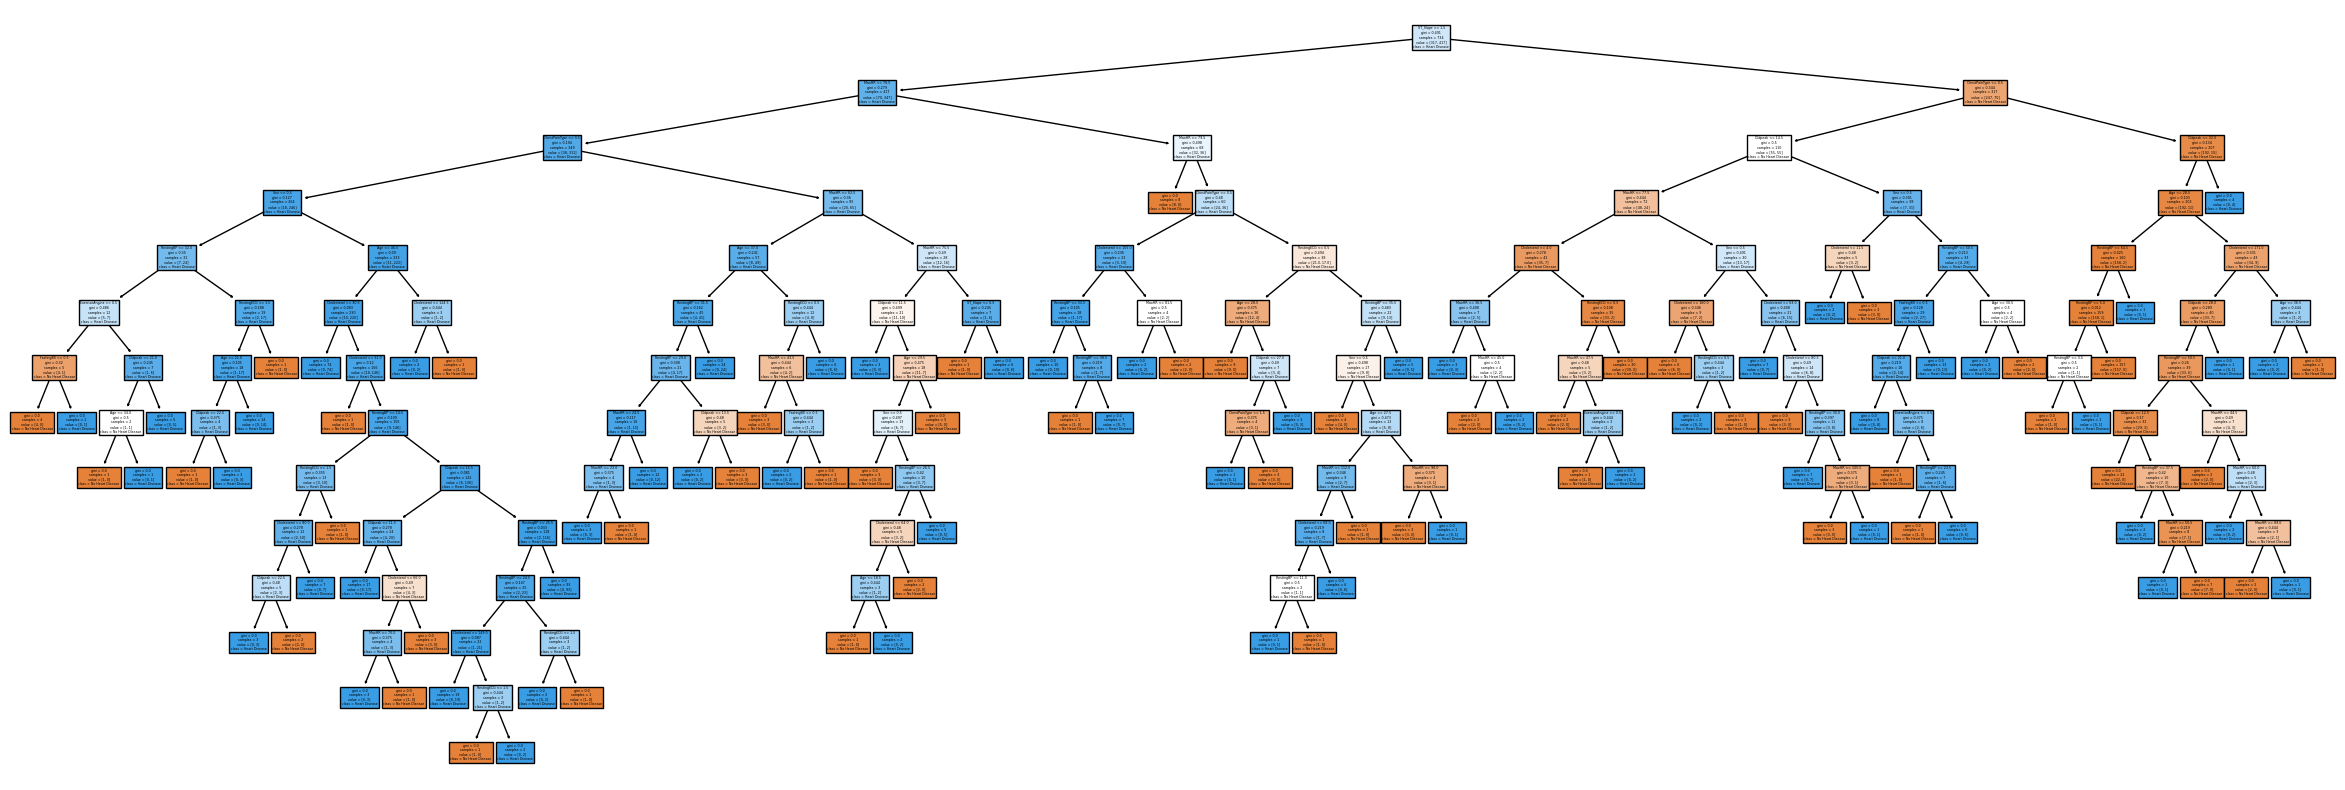

In [181]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 10))
plot_tree(model_DTC, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], filled=True)
plt.show()


Gördüğümüz üzere model'e her hangi bir sınırlama getirmediğimiz için o kadar ayrıntılı bir ağaç oluşturdu ki kendi veri setindeki hiç bir veri dışarda kalmayacak şekilde sınıflandırma yapabilir hale geldi. Yani kendi veri setini kusursuz öğrendi ve aşırı uyum (overfitting) gösterdi. 

In [182]:
from sklearn.tree import DecisionTreeClassifier

model_DTC = DecisionTreeClassifier(random_state=11, max_leaf_nodes=10, criterion='entropy')
model_DTC.fit(X_train, y_train)

y_test_pred = model_DTC.predict(X_test)
y_train_pred = model_DTC.predict(X_train)

print("Train :", metrics(y_train, y_train_pred))
print("Test :", metrics(y_test, y_test_pred))

Train : {'Accuracy': 0.8583106267029973, 'Precision': 0.8402555910543131, 'Recall': 0.8296529968454258, 'F1 Score': 0.834920634920635}
Test : {'Accuracy': 0.8043478260869565, 'Precision': 0.8607594936708861, 'Recall': 0.7311827956989247, 'F1 Score': 0.7906976744186046}


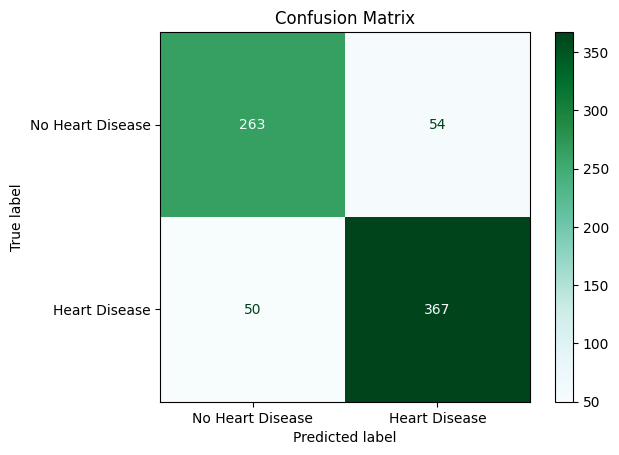

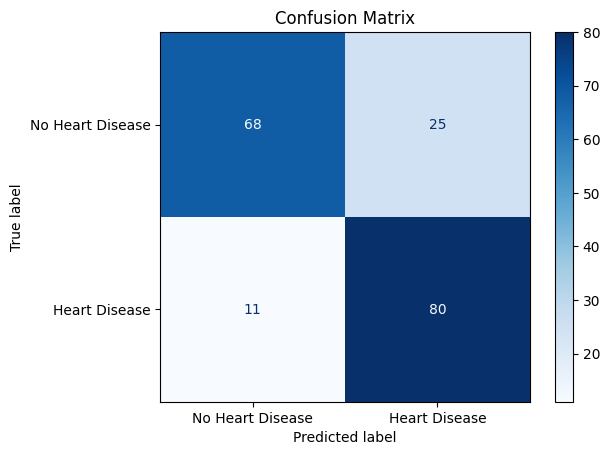

In [183]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap='BuGn')
plt.title('Confusion Matrix')
plt.show()

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


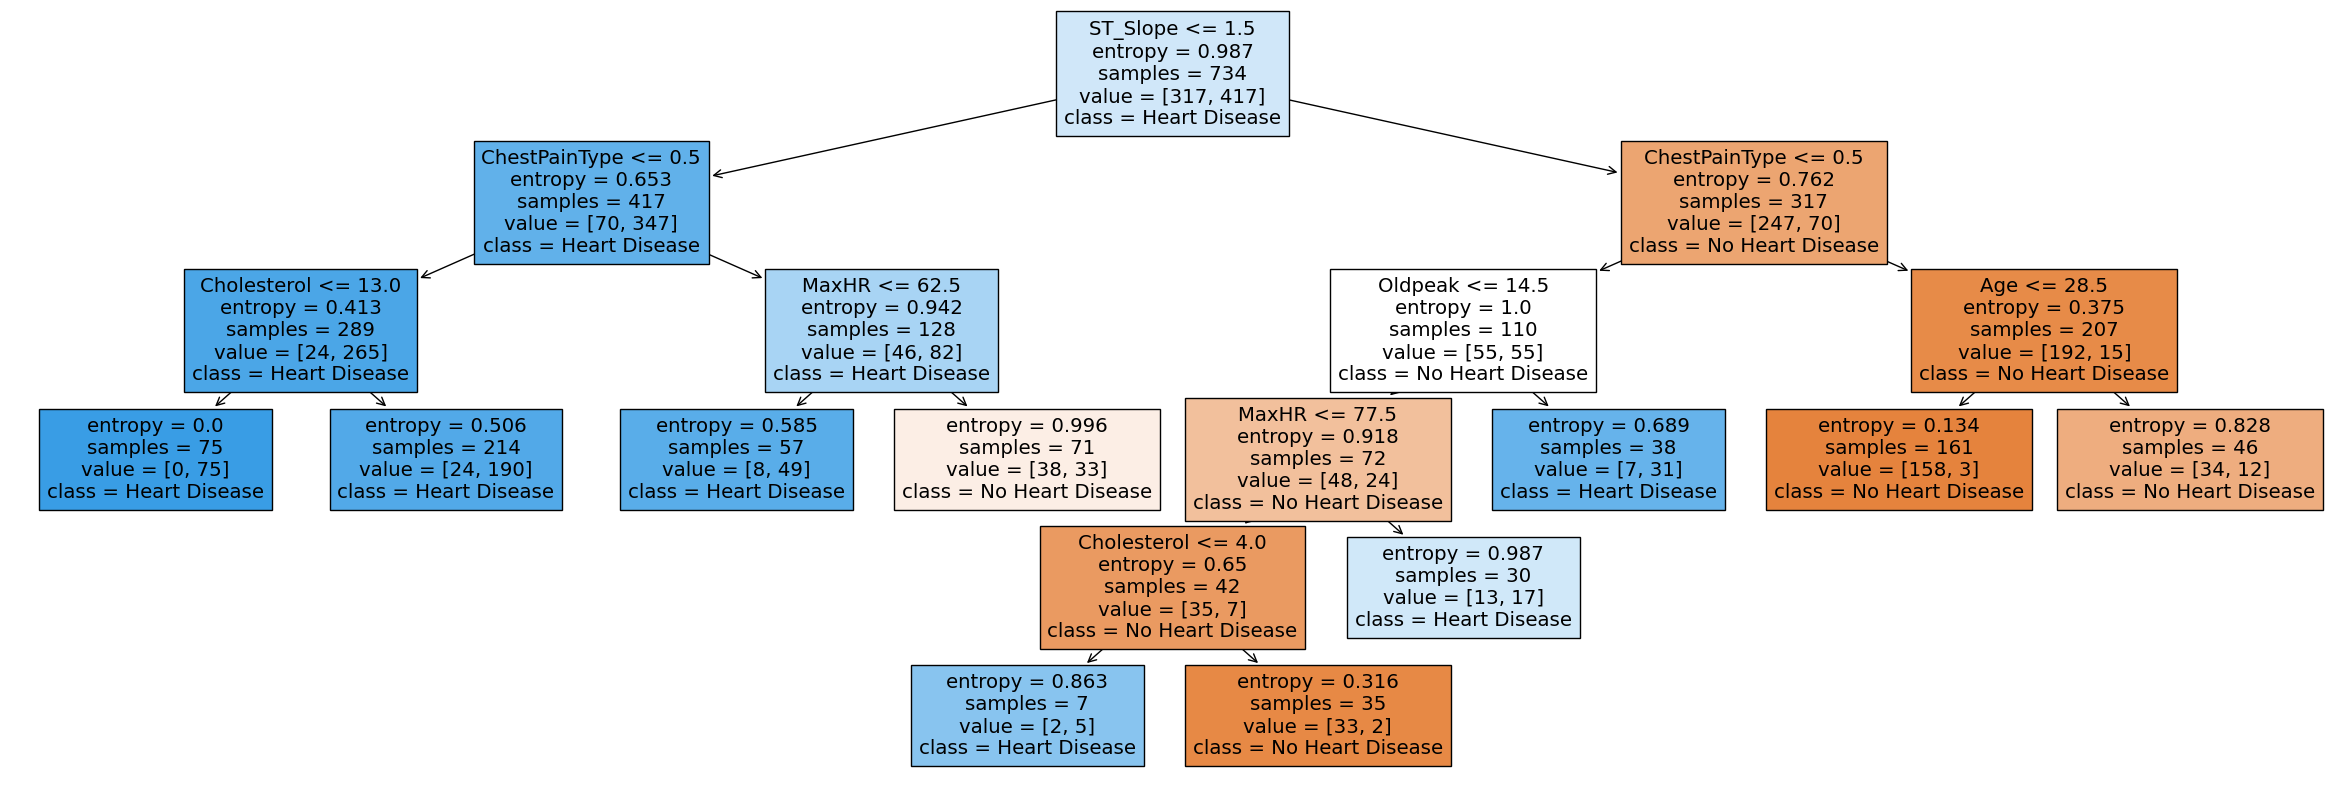

In [184]:
plt.figure(figsize=(30, 10))
plot_tree(model_DTC, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], filled=True)
plt.show()

### Random Forest 

In [200]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=17)

model_rf.fit(X_train, y_train)

y_test_pred_rf = model_rf.predict(X_test)
y_train_pred_rf = model_rf.predict(X_train)

print("Train :", metrics(y_train, y_train_pred_rf))
print("Test :", metrics(y_test, y_test_pred_rf))

Train : {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}
Test : {'Accuracy': 0.8532608695652174, 'Precision': 0.9230769230769231, 'Recall': 0.7741935483870968, 'F1 Score': 0.8421052631578947}


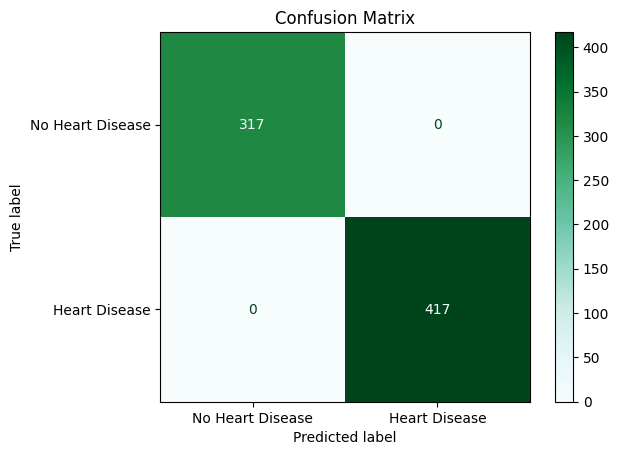

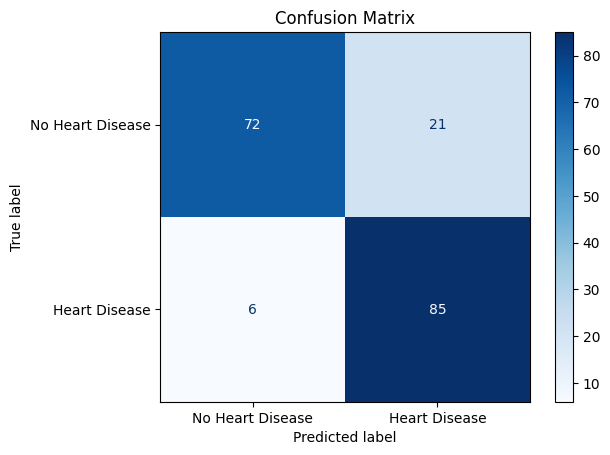

In [195]:
cm_rf = confusion_matrix(y_train, y_train_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Heart Disease', 'Heart Disease'])
disp_rf.plot(cmap='BuGn')
plt.title('Confusion Matrix')
plt.show()

cm_rf = confusion_matrix(y_test, y_test_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Heart Disease', 'Heart Disease'])
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Yine overfitting oluyor, demekki decision tree'lerin tümü %100 accuracy'ye sahip. Çünkü kullanılan decision tree'lere her hangi bir sınır vermedik.

In [187]:
model_rf = RandomForestClassifier(random_state=42)

model_rf.fit(X_train, y_train)

y_test_pred_rf = model_rf.predict(X_test)
y_train_pred_rf = model_rf.predict(X_train)

print("Train :", metrics(y_train, y_train_pred_rf))
print("Test :", metrics(y_test, y_test_pred_rf))

Train : {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}
Test : {'Accuracy': 0.842391304347826, 'Precision': 0.9102564102564102, 'Recall': 0.7634408602150538, 'F1 Score': 0.8304093567251462}


1. Cross Validation Nedir ve Ne İşe Yarar?
Modelin genellenebilirliğini test etmek amacıyla veri setini birden fazla alt kümeye bölen bir yöntemdir. Model, her bir alt küme için eğitim ve test işlemleri yaparak, modelin doğruluğunu ölçmeye çalışır. Verideki her bir satır en az bir kere test verisi haline gelir. Algoritma bir kere test verisi olarak seçtiği satırı bir daha seçmez.

Bir veri setini 5 katlamalı çapraz doğrulama ile test ediyorsanız, modeliniz her defasında veri setinin 5'te 4'ü ile eğitilecek ve geriye kalan 5'te 1'i ile test edilecektir. Bu işlem 5 kez tekrarlanacak ve sonunda 5 farklı doğruluk değeri elde edeceksiniz.

2. GridSearch Nedir ve Ne İşe Yarar?
Makine öğrenimi modellerinin hiperparametrelerini optimize etmek için kullanılan bir tekniktir. Bu teknik, belirtilen hiperparametre aralıklarında tüm olası kombinasyonları sistematik olarak dener ve en iyi performansı gösteren parametre setini bulmak için kullanılabilinir.


3. Peki GridSearchCV nedir ? (Grid Search Cross Validation)
Kısacası, Grid Search ve Cross Validation'ın sistematik olarak birleştirilmiş halidir. GridSearchCV, parametreleri seçmek için tüm olasılıkları dener ve her parametre kombinasyonu için çapraz doğrulama yaparak en iyi parametreyi bulur.

GridSearchCV, denenen her parametre kombinasyonunun başarısını ölçer ve en yüksek başarıyı gösteren parametre setini bulabilir.

## GridSearch Cross Validation

In [201]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10, 50, 100], 
    'max_features': ['sqrt', 'log2'], 
    'max_depth': [None, 5, 6, 7], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]}

model = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, n_jobs = 1, scoring = 'accuracy', cv = 5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train :", metrics(y_train, y_train_pred))
print("Test :", metrics(y_test, y_test_pred))

Train : {'Accuracy': 0.9482288828337875, 'Precision': 0.9573770491803278, 'Recall': 0.9211356466876972, 'F1 Score': 0.9389067524115756}
Test : {'Accuracy': 0.842391304347826, 'Precision': 0.9102564102564102, 'Recall': 0.7634408602150538, 'F1 Score': 0.8304093567251462}


In [202]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
best_param = model.best_params_


print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"Best Parameter: {best_param}")
print(len(model.cv_results_['params']), " Adet parametre kombinasyonu vardı")

Training Score: 0.9482288828337875
Test Score: 0.842391304347826
Best Parameter: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 42}
216  Adet parametre kombinasyonu vardı


In [210]:
model_rf = RandomForestClassifier(max_depth = 7, max_features = "sqrt", min_samples_leaf = 1, min_samples_split = 5, n_estimators = 50,random_state=42)

model_rf.fit(X_train, y_train)

y_test_pred_rf = model_rf.predict(X_test)
y_train_pred_rf = model_rf.predict(X_train)

print("Train :", metrics(y_train, y_train_pred_rf))
print("Test :", metrics(y_test, y_test_pred_rf))

Train : {'Accuracy': 0.9482288828337875, 'Precision': 0.9573770491803278, 'Recall': 0.9211356466876972, 'F1 Score': 0.9389067524115756}
Test : {'Accuracy': 0.842391304347826, 'Precision': 0.9102564102564102, 'Recall': 0.7634408602150538, 'F1 Score': 0.8304093567251462}


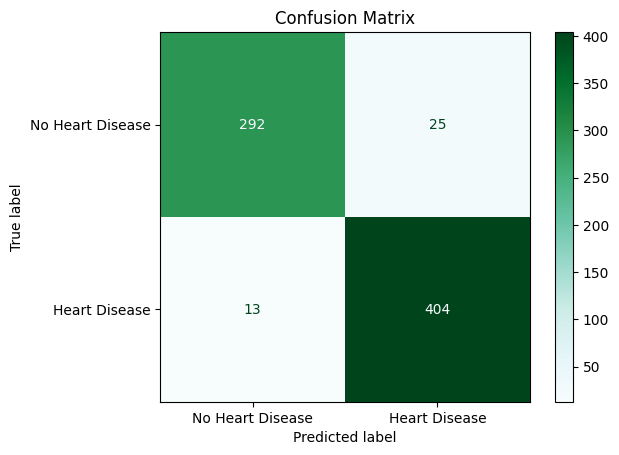

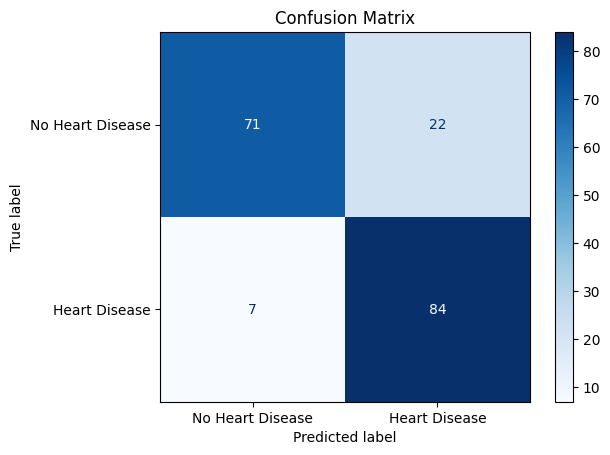

In [211]:
cm_rf = confusion_matrix(y_train, y_train_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Heart Disease', 'Heart Disease'])
disp_rf.plot(cmap='BuGn')
plt.title('Confusion Matrix')
plt.show()

cm_rf = confusion_matrix(y_test, y_test_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Heart Disease', 'Heart Disease'])
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()